# Importing Libraries

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)

# importing dataset

In [173]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [174]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [175]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [177]:
data.shape

(5110, 12)

# Handling Missing Data

In [178]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [179]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [180]:
data['bmi'].isnull().sum()

0

# Feature Generation

In [181]:
data.drop('id',axis=1,inplace=True)

In [182]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


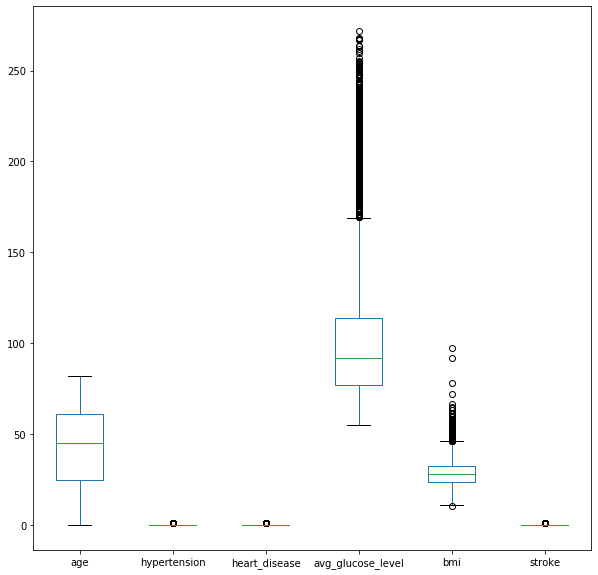

In [183]:
data.plot(kind='box')

plt.show()

In [184]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Label Encoding

In [186]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [187]:
gender=la.fit_transform(data['gender'])

In [188]:
smoking_status=la.fit_transform(data['smoking_status'])

In [189]:
ever_married=la.fit_transform(data['ever_married'])
work_type=la.fit_transform(data['work_type'])
Residence_type=la.fit_transform(data['Residence_type'])

In [190]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['work_type']=work_type
data['gender']=gender
data['smoking_status']=smoking_status

In [191]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null int32
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int32
work_type            5110 non-null int32
Residence_type       5110 non-null int32
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null int32
stroke               5110 non-null int64
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Partitioning

In [193]:
x=data.drop('stroke',axis=1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [194]:
y=data['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=None)

In [196]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2004,1,53.0,0,0,1,2,0,198.24,38.1,2
1173,0,59.0,0,0,1,2,0,224.71,42.9,2
4246,0,12.0,0,0,0,4,0,108.63,23.4,2
552,1,52.0,0,0,1,2,1,247.69,35.1,0
779,1,19.0,0,0,0,2,0,106.70,24.0,2
...,...,...,...,...,...,...,...,...,...,...
4115,0,31.0,0,0,0,2,0,70.51,26.9,1
4389,0,41.0,0,0,1,2,1,76.34,28.0,0
4211,0,81.0,0,1,0,3,1,99.44,27.7,0
2803,0,8.0,0,0,0,4,0,104.75,17.1,0


In [197]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4216,0,16.0,0,0,0,2,1,75.06,23.5,2
1440,1,65.0,0,0,1,2,1,59.87,28.5,3
3110,0,4.0,0,0,0,4,1,71.25,18.8,0
3163,1,24.0,0,0,1,2,0,73.78,21.4,3
1083,0,73.0,0,0,1,3,0,89.45,30.3,1
...,...,...,...,...,...,...,...,...,...,...
2079,0,4.0,0,0,0,4,0,206.25,17.0,0
3559,1,59.0,0,0,1,3,1,76.51,29.8,2
1279,1,66.0,0,0,0,2,1,108.03,27.2,2
4903,0,14.0,0,0,0,2,0,83.56,33.1,0


In [198]:
y_train

2004    0
1173    0
4246    0
552     0
779     0
       ..
4115    0
4389    0
4211    0
2803    0
1572    0
Name: stroke, Length: 4088, dtype: int64

In [199]:
y_test

4216    0
1440    0
3110    0
3163    0
1083    0
       ..
2079    0
3559    0
1279    0
4903    0
1798    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [200]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [201]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [202]:
x_train_std=std.fit_transform(x_train)

In [203]:
x_test_std=std.transform(x_test)

In [204]:
x_train_std

array([[ 1.19239295,  0.43445243, -0.33703565, ...,  2.00850641,
         1.19169636,  0.57645963],
       [-0.83864971,  0.69960237, -0.33703565, ...,  2.58863938,
         1.81175578,  0.57645963],
       [-0.83864971, -1.37740555, -0.33703565, ...,  0.04455797,
        -0.70723559,  0.57645963],
       ...,
       [-0.83864971,  1.67181885, -0.33703565, ..., -0.15685578,
        -0.1517657 , -1.29234843],
       [-0.83864971, -1.55417218, -0.33703565, ..., -0.04047852,
        -1.52106357, -1.29234843],
       [ 1.19239295, -1.37740555, -0.33703565, ..., -0.93182751,
        -1.37896663, -1.29234843]])

In [207]:
import pickle
import os


# Lets save the scaler object

In [208]:
scaler_path=os.path.join('C:/Users/vaibhav/Project/','model\scaler.pkl')
with open(scaler_path,"wb") as scaler_file:
    pickle.dump(std,scaler_file)

# Training

## Decision Tree

In [209]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [210]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [211]:
dt.feature_importances_

array([0.02172234, 0.17561359, 0.02478928, 0.01324784, 0.01126728,
       0.03524642, 0.01381773, 0.32943588, 0.30632764, 0.06853201])

In [212]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [213]:
y_pred_dt=dt.predict(x_test_std)

In [214]:
y_test

4216    0
1440    0
3110    0
3163    0
1083    0
       ..
2079    0
3559    0
1279    0
4903    0
1798    0
Name: stroke, Length: 1022, dtype: int64

In [215]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4216,0,16.0,0,0,0,2,1,75.06,23.5,2
1440,1,65.0,0,0,1,2,1,59.87,28.5,3
3110,0,4.0,0,0,0,4,1,71.25,18.8,0
3163,1,24.0,0,0,1,2,0,73.78,21.4,3
1083,0,73.0,0,0,1,3,0,89.45,30.3,1
...,...,...,...,...,...,...,...,...,...,...
2079,0,4.0,0,0,0,4,0,206.25,17.0,0
3559,1,59.0,0,0,1,3,1,76.51,29.8,2
1279,1,66.0,0,0,0,2,1,108.03,27.2,2
4903,0,14.0,0,0,0,2,0,83.56,33.1,0


In [216]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(y_test,y_pred_dt)

In [217]:
ac_dt

0.9099804305283757

In [242]:
import joblib
model_path=os.path.join('C:/Users/vaibhav/Project/','model\dt.sav')
joblib.dump(dt,model_path)

['C:/Users/vaibhav/Project/model\\dt.sav']

# Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [219]:
lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
y_pred_lr=lr.predict(x_test_std)

In [221]:
ac_lr=accuracy_score(y_test,y_pred_lr)

In [222]:
ac_lr

0.952054794520548

# KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [224]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [225]:
y_pred_knn=knn.predict(x_test_std)

In [226]:
ac_knn=accuracy_score(y_test,y_pred_knn)

In [227]:
ac_knn

0.9510763209393346

# Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [229]:
rf.fit(x_train_std,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [230]:
y_pred_rf=rf.predict(x_test_std)

In [231]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [232]:
ac_rf=accuracy_score(y_test,y_pred_rf)

In [233]:
ac_rf

0.952054794520548

# SVM

In [234]:
from sklearn.svm import SVC

In [235]:
sv=SVC()

In [236]:
sv.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [237]:
y_pred_sv=sv.predict(x_test_std)

In [238]:
y_pred_sv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [239]:
ac_svc=accuracy_score(y_test,y_pred_sv)

In [240]:
ac_svc

0.952054794520548

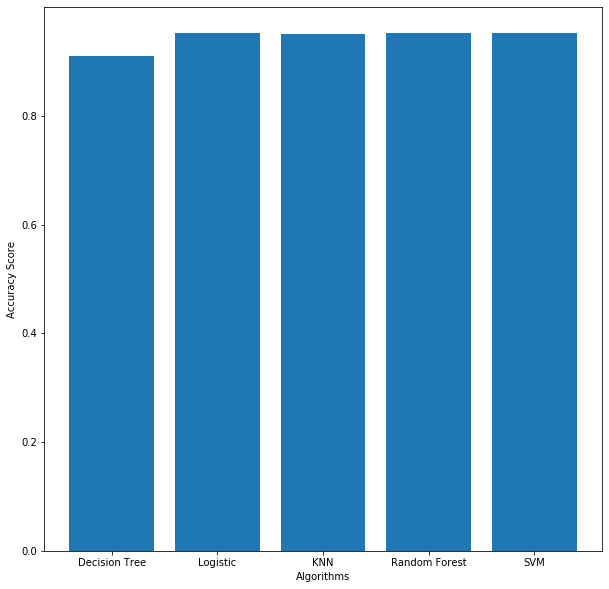

In [241]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_svc])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()